In [29]:
import pysid

# Pacotes auxiliares
# Carrega o pacote de manipulação numérica
import numpy as np
# Carrega o pacote de manipulação de sinais
import scipy.signal as sig
# Carrega o pacote para geração de gráficos
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import vrft
from scipy import signal  # signal processing library

4998


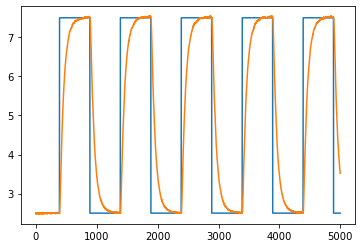

In [140]:
# importar os ados 
#filename = 'C:\\Users\\VITOR\\Desktop\\ControleDigital\\Area3\\TRABALHO\\MATLAB\\DadosEnsaioSIMUL.txt'
#caso REAL 
filename = 'C:\\Users\\VITOR\\Desktop\\ControleDigital\\Area3\\TRABALHO\\python\\UTILIZADOS\\ma2575500.txt' # tem ruido e os caralho 
#CASO VRFT
#filename = 'C:\\Users\\VITOR\\Desktop\\ControleDigital\\Area3\\TRABALHO\\MATLAB\\DADOSIDENTIFICAR.txt'
dados = np.loadtxt(filename, delimiter=',', skiprows=2) # Pular 405 se estiver trabalhado com o ma27.txt
u =  dados[:,1]
y =  dados[:,2]
# IMPORTANT: in our package, we decided to organize the input and output signals as a matrix (N,n)
# N=number of data samples, n=number of inputs and outputs
# Vetores de entrada e de saída
tam = len(u)
aux = np.ones((tam, 1))
print(len(aux))


aux = np.ones((tam, 1)) # crio matriz
for i in range(tam): 
    aux[i,0] = u[i]  # preencho matriz
u = aux # sobreescre 

aux = np.ones((tam, 1))
for i in range(tam):
    aux[i,0] = y[i]
y = aux


plt.plot(u)
plt.plot(y)



In [141]:


#%% Control - VRFT parameters: reference model Td(z), filter L(z), and controller structure

# declaration of the transfer fuction of the reference model Td(z)
Ts = 0.5 # tempo de amostragem
Td = signal.TransferFunction([0.0344], [1.0000 , -0.9656], dt=Ts) # TD 
print(Td)
# choosing the VRFT method filter
L = signal.TransferFunction([0, 0.0344, -0.0344], [1.0000,   -1.9312,    0.9324], dt=Ts)

# defining the controller structure that will be used in the method
C = [ 
    [signal.TransferFunction([1], [1], dt=Ts)],             # P
    # z^2/(z^2-z) 
    [signal.TransferFunction([1,0], [1, -1], dt=Ts)],              # I 
    # z/(z^2-z)
    [signal.TransferFunction([1, -1], [1, 0], dt=Ts)]      # D
    # 1/(z^2-z)
]  # PID controller structure

#%% Design the controller using the VRFT method

# VRFT with least squares
p = vrft.design(u, y, y, Td, C,L)
print("p=", p)

TransferFunctionDiscrete(
array([0.0344]),
array([ 1.    , -0.9656]),
dt: 0.5
)


C:\Users\VITOR\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1631: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


p= [[2.34668505]
 [0.03200404]
 [8.87871051]]


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1

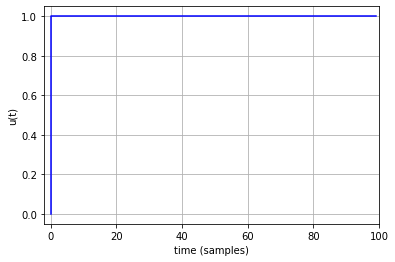

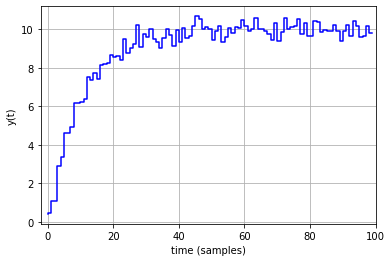

p= [[ 0.17704513]
 [-0.15591916]]


In [138]:
# -*- coding: utf-8 -*-
"""
EXEMPLO
Created on Thu Mar 7 14:37:39 2019
@authors: Diego Eckhard and Emerson Boeira
"""
"""
Testing the vrft on a SISO example
"""
#%% Header: importing python libraries

import numpy as np  # important package for scientific computing
from scipy import signal  # signal processing library
import matplotlib.pyplot as plt  # library to plot graphics
import vrft  # vrft package

#%% Simulating the open loop system to obtain the data for the VRFT

# declaration of the SISO transfer fuction of the process G(z)
G = signal.TransferFunction([1], [1, -0.9], dt=1)
# IMPORTANT: if the numerator of the transfer function is 1, for example, define it as num=[1], instead of num=[0,1]
# num=[0,1] produces a warning!

# number of samples
N = 100

# step signal
u = np.ones((N, 1))
print(u)
u[0] = 0
print(u)
# IMPORTANT: in our package, we decided to organize the input and output signals as a matrix (N,n)
# N=number of data samples, n=number of inputs and outputs

# calculating the output of the system
yu = vrft.filter(G, u)

# add noise to the output
# variance of the whie noise signal
sigma2_e1 = 0.1
# creating noise vector
w = np.random.normal(0, np.sqrt(sigma2_e1), N)
# pushing the dimensions to match our signals
w.shape = (N, 1)

# real (measured) output
y = yu + w

#%% Graphics

lw=1.5 # linewidth

# plot input signal
plt.figure()
plt.plot(u, "b", drawstyle="steps", linewidth=lw, label="u(t)")
plt.grid(True)
plt.xlabel("time (samples)")
plt.ylabel("u(t)")
plt.xlim(left=-2, right=N)
plt.show()

# plot output signal
plt.figure()
plt.plot(y, "b", drawstyle="steps", linewidth=lw, label="u(t)")
plt.grid(True)
plt.xlabel("time (samples)")
plt.ylabel("y(t)")
plt.xlim(left=-2, right=N)
plt.show()

#%% Control - VRFT parameters: reference model Td(z), filter L(z), and controller structure

# declaration of the transfer fuction of the reference model Td(z)
Td = signal.TransferFunction([0.2], [1, -0.8], dt=1)

# choosing the VRFT method filter
L = signal.TransferFunction([0.25], [1, -0.75], dt=1)

# defining the controller structure that will be used in the method
C = [
    [signal.TransferFunction([1, 0], [1, -1], dt=1)],
    [signal.TransferFunction([1], [1, -1], dt=1)],
]  # PI controller structure

#%% Design the controller using the VRFT method

# VRFT with least squares
p = vrft.design(u, y, y, Td, C, L)
print("p=", p)

